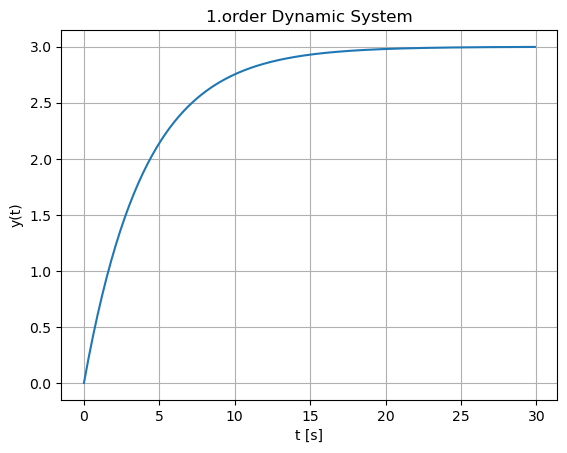

In [1]:
#Dynamic System dan Models
import numpy as np
import matplotlib.pyplot as plt
K = 3
T = 4
start = 0
stop = 30
increment = 0.1
t = np.arange(start,stop,increment)
y = K * (1-np.exp(-t/T))
plt.plot (t,y)
plt.title('1.order Dynamic System')
plt.xlabel('t [s]')
plt.ylabel('y(t)')
plt.grid()

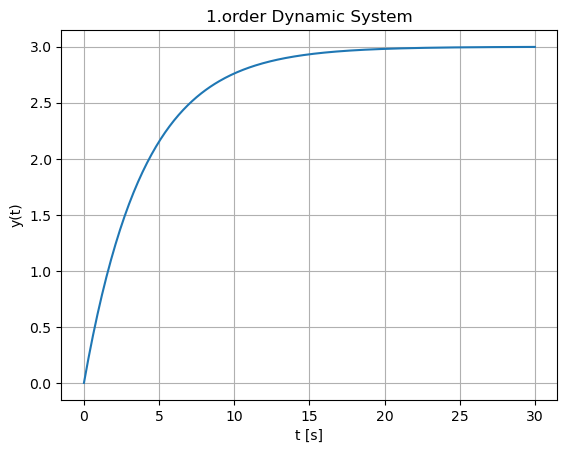

In [2]:
#Using ODE Solver
import numpy as np
import matplotlib.pyplot as plt
# Model Parameters
K = 3
T = 4

a = -1/T
b = K/T

# Simulation Parameters
Ts = 0.1
Tstop = 30
uk = 1 # Step Response
yk = 0 # Initial Value
N = int(Tstop/Ts) # Simulation length
data = []
data.append(yk)
# Simulation
for k in range(N):
    yk1 = (1 + a*Ts) * yk + Ts * b * uk
    yk = yk1
    data.append(yk1)
# Plot the Simulation Results
t = np.arange(0,Tstop+Ts,Ts)
plt.plot(t,data)
plt.title('1.order Dynamic System')
plt.xlabel('t [s]')
plt.ylabel('y(t)')
plt.grid()

In [5]:
!pip install control

   ---------------------------------------- 0.0/578.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/578.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/578.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/578.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/578.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/578.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/578.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/578.3 kB ? eta -:--:--
   ------------------ --------------------- 262.1/578.3 kB ? eta -:--:--
   ------------------ --------------------- 262.1/578.3 kB ? eta -:--:--
   ------------------ --------------------- 262.1/578.3 kB ? eta -:--:--
   ------------------ --------------------- 262.1/578.3 kB ? eta -:--:--
   ------------------ --------------------- 262.1/578.3 kB ? eta -:--:--
   ---------------------------------- --- 524.3/578.3 kB 234.9 kB/s

H(s)= <TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     3
  -------
  4 s + 1


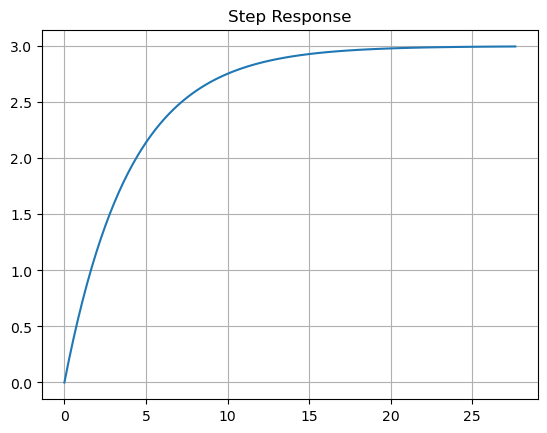

In [6]:
#Order Transfer Fungsi
import control as ct
import numpy as np
import matplotlib.pyplot as plt
K = 3
T = 4
num = np.array([K])
den = np.array([T , 1])
H = ct.tf(num , den)
print ('H(s)=', H)
t, y = ct.step_response(H)
plt.plot(t,y)
plt.title("Step Response")
plt.grid()

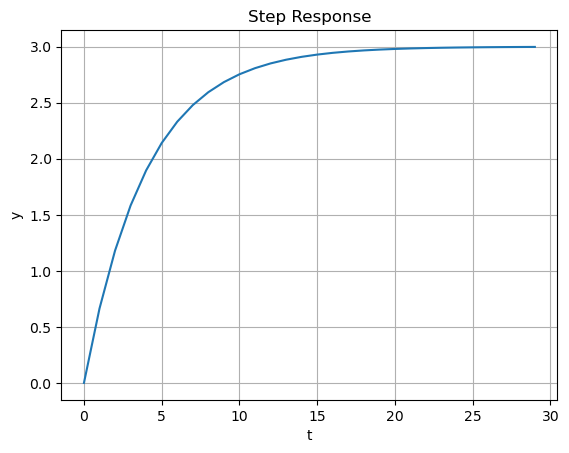

In [4]:
#State-space Models
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np
#Simulation Parameters
x0 = [0,0]
start = 0
stop = 30
step = 1
t = np.arange(start,stop,step)
K = 3
T = 4

# State-space Model
A = [[-1/T, 0],
[0, 0]]
B = [[K/T],
[0]]
C = [[1, 0]]
D = 0

sys = sig.StateSpace(A, B, C, D)
# Step Response
t, y = sig.step(sys, x0, t)
# Plotting
plt.plot(t, y)
plt.title("Step Response")
plt.xlabel("t")
plt.ylabel("y")
plt.grid()
plt.show()

TransferFunctionContinuous(
array([0.75, 0.  ]),
array([1.  , 0.25, 0.  ]),
dt: None
)


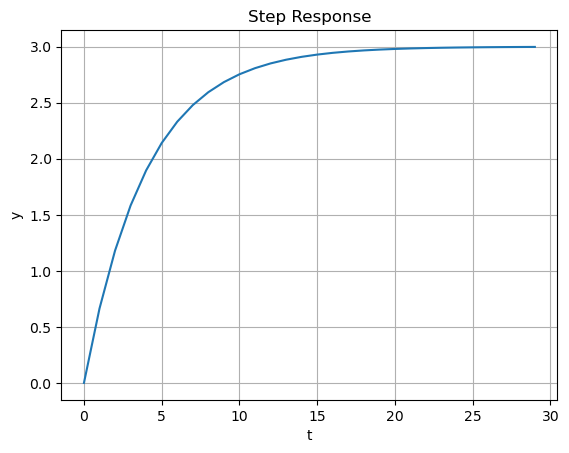

In [9]:
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np
#Simulation Parameters
x0 = [0,0]
start = 0; stop = 30; step = 1
t = np.arange(start,stop,step)
K = 3; T = 4
# State-space Model
A = [[-1/T, 0],
[0, 0]]
B = [[K/T],
[0]]
C = [[1, 0]]
D = 0

sys = sig.StateSpace(A, B, C, D)
H = sys.to_tf()
print(H)
# Step Response
t, y = sig.step(H, x0, t)
# Plotting
plt.plot(t, y)
plt.title("Step Response")
plt.xlabel("t"); plt.ylabel("y")
plt.grid()
plt.show()
sys = ct.TransferFunction(
    [0.75, 0],
    [1, 0.25, 0],
    dt=None
)


H(s) = TransferFunctionContinuous(
array([0.4, 0.2]),
array([1.        , 0.53333333, 0.06666667]),
dt: None
)


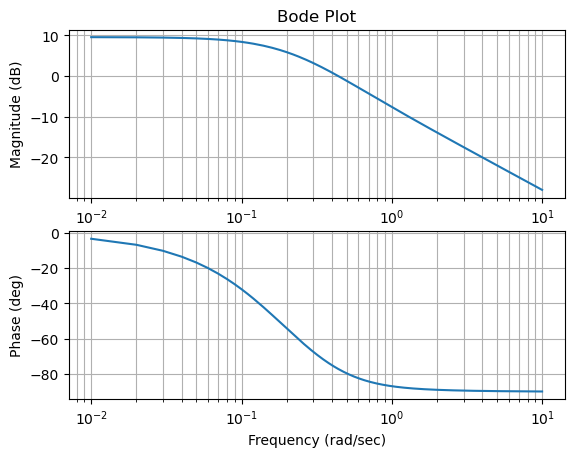

In [12]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
# Define Transfer Function
num1 = np.array([3])
num2 = np.array([2, 1])
num = np.convolve(num1, num2)
den1 = np.array([3, 1])
den2 = np.array([5, 1])
den = np.convolve(den1, den2)
H = signal.TransferFunction(num, den)
print ('H(s) =', H)
# Frequencies
w_start = 0.01
w_stop = 10
step = 0.01
N = int ((w_stop-w_start )/step) + 1
w = np.linspace (w_start , w_stop , N)
# Bode Plot
w, mag, phase = signal.bode(H, w)
plt.figure()
plt.subplot (2, 1, 1)
plt.semilogx(w, mag) # Bode Magnitude Plot
plt.title("Bode Plot")
plt.grid(True, which='major', axis='both')
plt.grid(True, which='minor', axis='both')
plt.ylabel("Magnitude (dB)")
plt.subplot (2, 1, 2)
plt.semilogx(w, phase) # Bode Phase plot
plt.grid(True, which='major', axis='both')
plt.grid(True, which='minor', axis='both')
plt.ylabel("Phase (deg)")
plt.xlabel("Frequency (rad/sec)")
plt.show()

H(s) = <TransferFunction>: sys[4]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

      6 s + 3
  ----------------
  15 s^2 + 8 s + 1


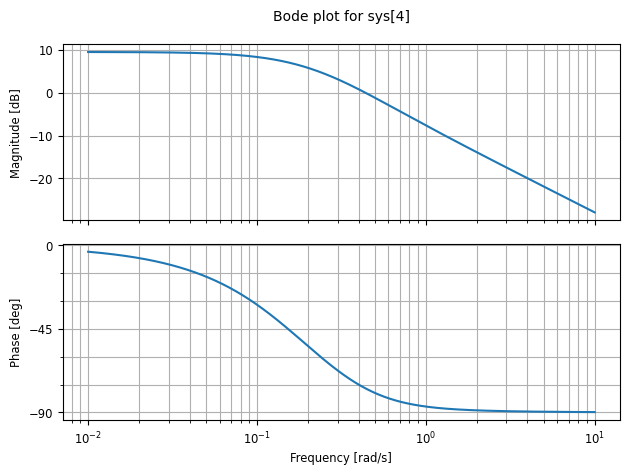

In [13]:
import numpy as np
import control
# Define Transfer Function
num1 = np.array([3])
num2 = np.array([2, 1])
num = np.convolve(num1, num2)
den1 = np.array([3, 1])
den2 = np.array([5, 1])
den = np.convolve(den1, den2)
H = control.tf(num, den)
print ('H(s) =', H)
# Bode Plot
control.bode(H, dB=True)

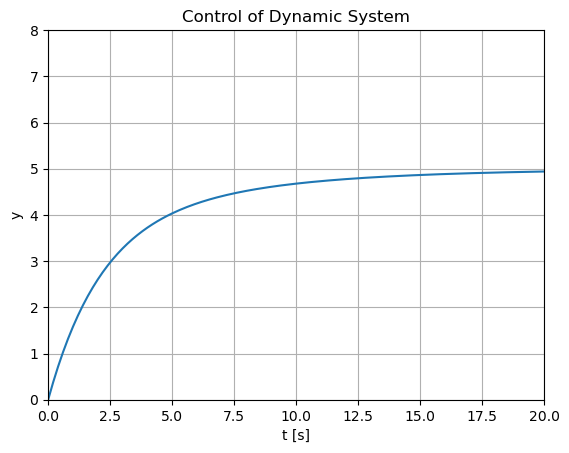

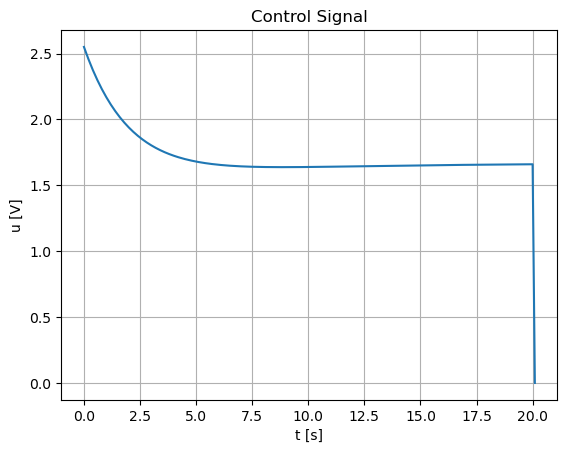

In [14]:
#PID Kontrol
import numpy as np
import matplotlib.pyplot as plt
# Model Parameters
K = 3
T = 4
a = -(1/T)
b = K/T
# Simulation Parameters
Ts = 0.1 # Sampling Time
Tstop = 20 # End of Simulation Time
N = int(Tstop/Ts) # Simulation length
y = np.zeros(N+2) # Initialization the Tout vector
y[0] = 0 # Initial Value
# PI Controller Settings
Kp = 0.5
Ti = 5

r = 5 # Reference value
e = np.zeros(N+2) # Initialization
u = np.zeros(N+2) # Initialization
# Simulation
for k in range(N+1):
    e[k] = r - y[k]
    u[k] = u[k-1] + Kp*(e[k] - e[k-1]) + (Kp/Ti)*Ts*e[k]
    y[k+1] = (1+Ts*a)*y[k] + Ts*b*u[k]
# Plot the Simulation Results
t = np.arange(0,Tstop+2*Ts,Ts) #Create the Time Series
# Plot Process Value
plt.figure(1)
plt.plot(t,y)
# Formatting the appearance of the Plot
plt.title('Control of Dynamic System')
plt.xlabel('t [s]')
plt.ylabel('y')
plt.grid()
xmin = 0
xmax = Tstop
ymin = 0
ymax = 8
plt.axis([xmin, xmax, ymin, ymax])
plt.show()
# Plot Control Signal
plt.figure(2)
plt.plot(t,u)
# Formatting the appearance of the Plot
plt.title('Control Signal')
plt.xlabel('t [s]')
plt.ylabel('u [V]')
plt.grid()

Hp(s) = <TransferFunction>: sys[32]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     3
  -------
  4 s + 1
Hc(s) = <TransferFunction>: sys[33]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  0.8 s + 0.4
  -----------
      2 s
Hm(s) = <TransferFunction>: sys[34]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    1
  -----
  s + 1
Hf(s) = <TransferFunction>: sys[35]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    1
  -----
  s + 1
L(s) = <TransferFunction>: sys[38]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

           2.4 s + 1.2
  -----------------------------
  8 s^4 + 18 s^3 + 12 s^2 + 2 s
T(s) = <TransferFunction>: sys[40]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

               2.4 s + 1.2
  -------------------------------------
  8 s^4 + 18 s^3 + 12 s^2 + 4.4 s + 1.2


C:\Users\SMCID Yamin\anaconda3\Lib\site-packages\control\pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


Poles = [-1.40867554+0.j         -0.61123728+0.j         -0.11504359+0.40121555j
 -0.11504359-0.40121555j]
Zeros = [-0.5+0.j]
wc = 0.37 rad/s
w180 = 0.77 rad/s
GM = 3.57
GM = 11.06 dB
PM = 30.09 deg
Kc = 1.43


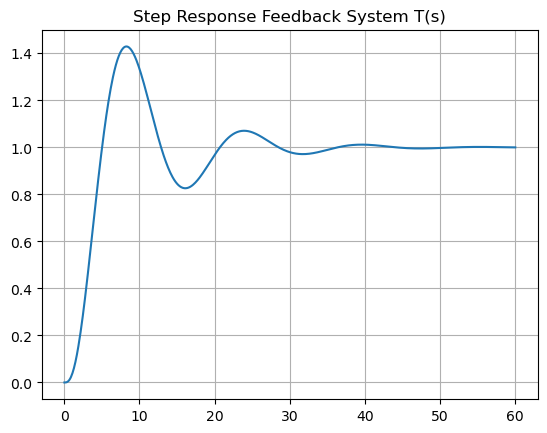

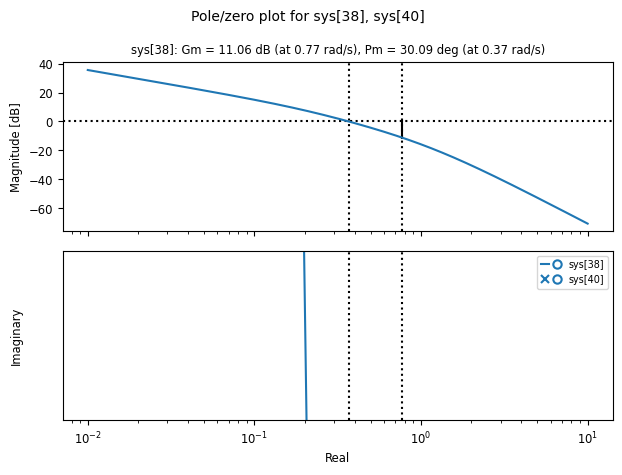

In [17]:
#Stability Analysis
import numpy as np
import matplotlib.pyplot as plt
import control
# Transfer Function Process
K = 3; T = 4
num_p = np.array ([K])
den_p = np.array ([T , 1])
Hp = control.tf(num_p , den_p)
print ('Hp(s) =', Hp)
# Transfer Function PI Controller
Kp = 0.4
Ti = 2
num_c = np.array ([Kp*Ti, Kp])
den_c = np.array ([Ti , 0])
Hc = control.tf(num_c, den_c)
print ('Hc(s) =', Hc)
# Transfer Function Measurement
Tm = 1
num_m = np.array ([1])
den_m = np.array ([Tm , 1])
Hm = control.tf(num_m , den_m)
print ('Hm(s) =', Hm)
# Transfer Function Lowpass Filter
Tf = 1
num_f = np.array ([1])
den_f = np.array ([Tf , 1])
Hf = control.tf(num_f , den_f)
print ('Hf(s) =', Hf)
# The Loop Transfer function
L = control.series(Hc, Hp, Hf, Hm)
print ('L(s) =', L)
# Tracking transfer function
T = control.feedback(L,1)
print ('T(s) =', T)
# Step Response Feedback System (Tracking System)
t, y = control.step_response(T)
plt.figure(1)
plt.plot(t,y)
plt.title("Step Response Feedback System T(s)")
plt.grid()
# Bode Diagram with Stability Margins
plt.figure(2)
control.bode(L, dB=True, deg=True, display_margins=True)
# Poles and Zeros
control.pzmap(T, plot=True)
p = control.poles(T)
z = control.zeros(T)
print("Poles =", p)
print("Zeros =", z)
# Calculating stability margins and crossover frequencies
gm , pm , w180 , wc = control.margin(L)
# Convert gm to Decibel
gmdb = 20 * np.log10(gm)
print("wc =", f'{wc:.2f}', "rad/s")
print("w180 =", f'{w180:.2f}', "rad/s")
print("GM =", f'{gm:.2f}')
print("GM =", f'{gmdb:.2f}', "dB")
print("PM =", f'{pm:.2f}', "deg")
# Find when Sysem is Marginally Stable (Kritical Gain - Kc)
Kc = Kp*gm
print("Kc =", f'{Kc:.2f}')